In [1]:
#!pip install -U layoutparser

     |████████████████████████████████| 19.2 MB 1.3 MB/s 
     |████████████████████████████████| 596 kB 54.2 MB/s 
     |████████████████████████████████| 139 kB 53.2 MB/s 
     |████████████████████████████████| 5.6 MB 44.4 MB/s 
     |████████████████████████████████| 3.1 MB 46.5 MB/s 
     |████████████████████████████████| 4.0 MB 43.3 MB/s 
  Attempting uninstall: pillow
    Found existing installation: Pillow 7.1.2
    Uninstalling Pillow-7.1.2:
      Successfully uninstalled Pillow-7.1.2
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [1]:
#!pip install 'git+https://github.com/facebookresearch/detectron2.git@v0.4#egg=detectron2'

  Cloning https://github.com/facebookresearch/detectron2.git (to revision v0.4) to /tmp/pip-install-3yi9mvfm/detectron2_aced16cc6c2b4baaa647a817ebf21d9b
  Running command git clone -q https://github.com/facebookresearch/detectron2.git /tmp/pip-install-3yi9mvfm/detectron2_aced16cc6c2b4baaa647a817ebf21d9b
  Running command git checkout -q 4aca4bdaa9ad48b8e91d7520e0d0815bb8ca0fb1
     |████████████████████████████████| 47 kB 4.2 MB/s 
     |████████████████████████████████| 78 kB 6.5 MB/s 
     |████████████████████████████████| 117 kB 65.7 MB/s 
  Created wheel for detectron2: filename=detectron2-0.4-cp37-cp37m-linux_x86_64.whl size=4843860 sha256=2530765601c3536d0efbc48d952477ea72fb28cfe2f3e5f435b653d40786834d
  Stored in directory: /tmp/pip-ephem-wheel-cache-bmokkryt/wheels/87/3f/26/dc45098d34763c9dc05ea3ab35c6dec6e9e8c16ac741efb741
  Created wheel for fvcore: filename=fvcore-0.1.3.post20210317-py3-none-any.whl size=58542 sha256=a80f87ac26ef666ec33ff1340fd73aecca60a94346efd131ae5ed2b76

In [1]:
#!pip install layoutparser[ocr]

     |████████████████████████████████| 435 kB 15.6 MB/s 


In [1]:
#!git clone https://github.com/Layout-Parser/layout-parser.git

Cloning into 'layout-parser'...
remote: Enumerating objects: 1340, done.
remote: Counting objects: 100% (383/383), done.
remote: Compressing objects: 100% (120/120), done.
remote: Total 1340 (delta 335), reused 263 (delta 263), pack-reused 957
Receiving objects: 100% (1340/1340), 62.85 MiB | 1.34 MiB/s, done.
Resolving deltas: 100% (733/733), done.


In [2]:
#%cd layout-parser/

/content/layout-parser


In [5]:
import cv2
image = cv2.imread("/content/layout-parser/examples/data/Oversampling_Techniques_for_Bankruptcy_Prediction__page-0007.jpg")
image = image[..., ::-1]

/usr/local/lib/python3.7/dist-packages/detectron2/structures/image_list.py:101: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  max_size = (max_size + (stride - 1)) // stride * stride


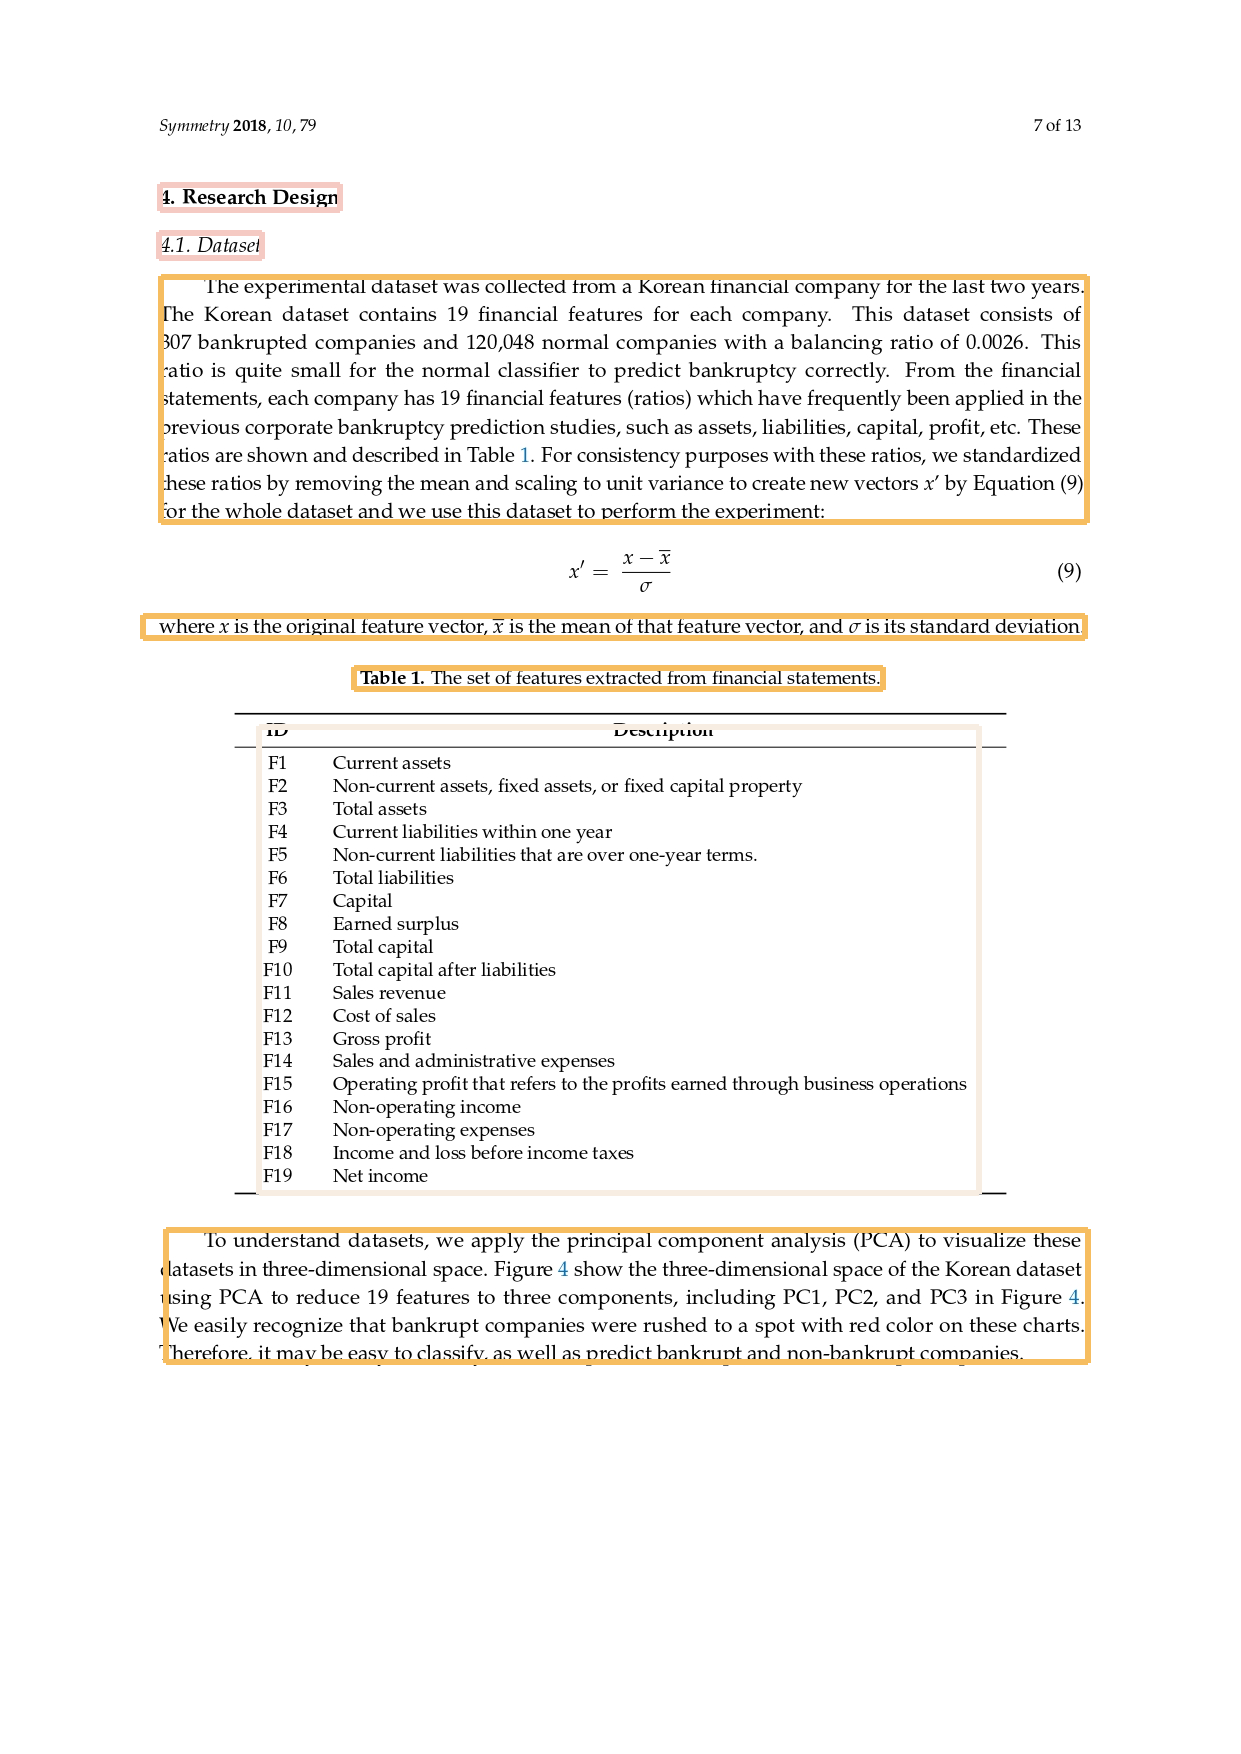

In [6]:
import layoutparser as lp
model = lp.Detectron2LayoutModel('lp://PubLayNet/faster_rcnn_R_50_FPN_3x/config',extra_config=["MODEL.ROI_HEADS.SCORE_THRESH_TEST", 0.65],
                                 label_map={0: "Text", 1: "Title", 2: "List", 3:"Table", 4:"Figure"})
layout = model.detect(image)
lp.draw_box(image, layout,)

In [7]:
text_blocks = lp.Layout([b for b in layout if b.type=="Text"])
text_blocks

Layout(_blocks=[TextBlock(block=Rectangle(x_1=161.3275909423828, y_1=276.7421875, x_2=1086.53759765625, y_2=522.0596923828125), text=None, id=None, type=Text, parent=None, next=None, score=0.9982274174690247), TextBlock(block=Rectangle(x_1=166.76296997070312, y_1=1229.9945068359375, x_2=1087.03173828125, y_2=1362.9285888671875), text=None, id=None, type=Text, parent=None, next=None, score=0.9977947473526001), TextBlock(block=Rectangle(x_1=354.66461181640625, y_1=667.5526123046875, x_2=882.6885375976562, y_2=689.1924438476562), text=None, id=None, type=Text, parent=None, next=None, score=0.9963322281837463), TextBlock(block=Rectangle(x_1=143.34400939941406, y_1=615.613037109375, x_2=1084.2515869140625, y_2=638.3451538085938), text=None, id=None, type=Text, parent=None, next=None, score=0.9766103029251099)], page_data={})

In [8]:
figure_blocks = lp.Layout([b for b in layout if b.type=='Figure'])

In [9]:
figure_blocks

Layout(_blocks=[], page_data={})

In [10]:
text_blocks = lp.Layout([b for b in text_blocks \
                   if not any(b.is_in(b_fig) for b_fig in figure_blocks)])

In [11]:
h, w = image.shape[:2]

left_interval = lp.Interval(0, w/2*1.05, axis='x').put_on_canvas(image)

left_blocks = text_blocks.filter_by(left_interval, center=True)
left_blocks.sort(key = lambda b:b.coordinates[1])

right_blocks = [b for b in text_blocks if b not in left_blocks]
right_blocks.sort(key = lambda b:b.coordinates[1])

# And finally combine the two list and add the index
# according to the order
text_blocks = lp.Layout([b.set(id = idx) for idx, b in enumerate(left_blocks + right_blocks)])

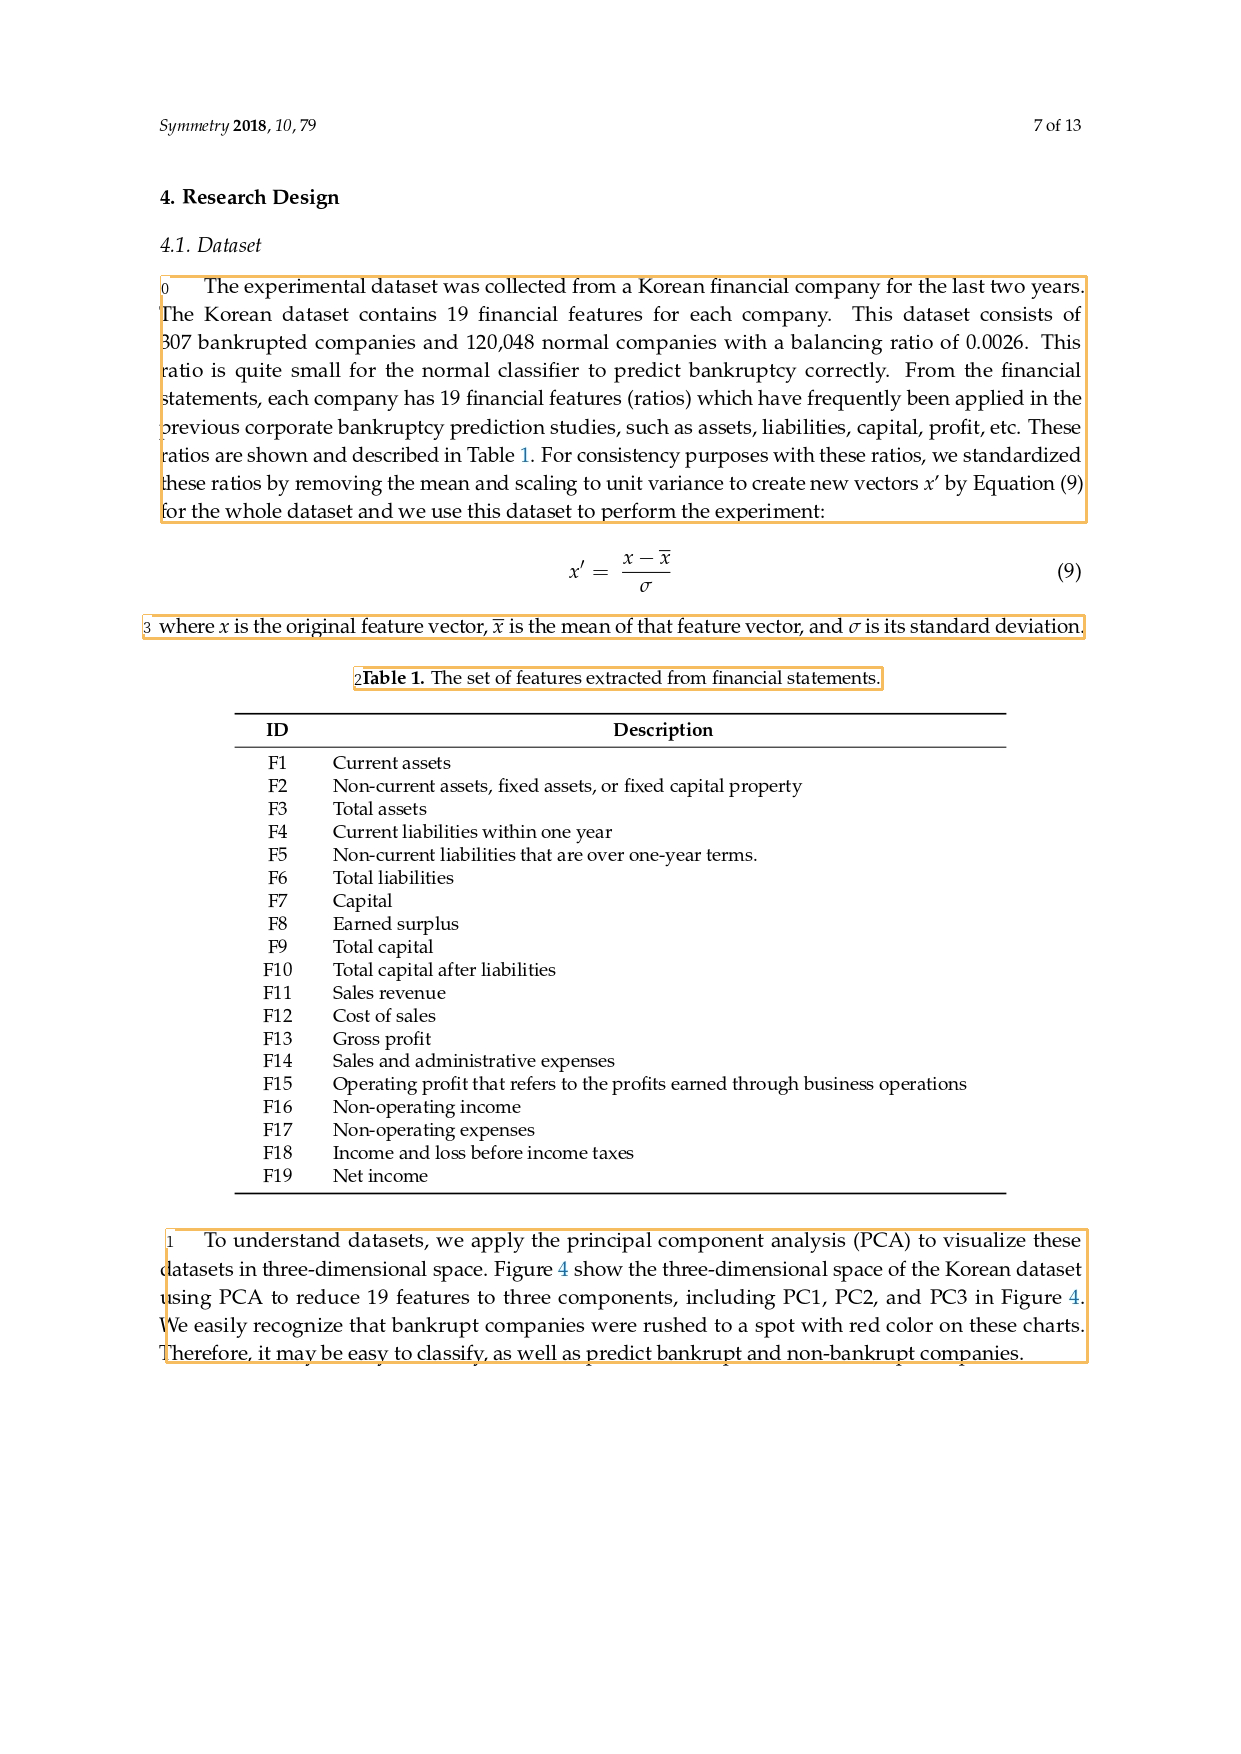

In [12]:
lp.draw_box(image, text_blocks,
            box_width=3, 
            show_element_id=True)

In [13]:
ocr_agent = lp.TesseractAgent(languages='eng')

In [14]:
!sudo apt install tesseract-ocr

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following packages were automatically installed and are no longer required:
  libnvidia-common-460 nsight-compute-2020.2.0
Use 'sudo apt autoremove' to remove them.
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 67 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 0s (25.5 MB

In [15]:
for block in text_blocks:
    segment_image = (block
                       .pad(left=5, right=5, top=5, bottom=5)
                       .crop_image(image))
        # add padding in each image segment can help
        # improve robustness 
        
    text = ocr_agent.detect(segment_image)
    block.set(text=text, inplace=True)

In [16]:
for txt in text_blocks.get_texts():
    print(txt, end='\n---\n')

The experimental dataset was collected from a Korean financial company for the last two years.
The Korean dataset contains 19 financial features for each company. This dataset consists of
307 bankrupted companies and 120,048 normal companies with a balancing ratio of 0.0026. This
ratio is quite small for the normal classifier to predict bankruptcy correctly. From the financial
statements, each company has 19 financial features (ratios) which have frequently been applied in the
previous corporate bankruptcy prediction studies, such as assets, liabilities, capital, profit, etc. These
ratios are shown and described in Table 1. For consistency purposes with these ratios, we standardized

these ratios by removing the mean and scaling to unit variance to create new vectors x’ by Equation (9)
for the whole dataset and we use this dataset to perform the experiment:

---
To understand datasets, we apply the principal component analysis (PCA) to visualize these
datasets in three-dimensional spa

In [17]:
text_blocks.get_texts()

['The experimental dataset was collected from a Korean financial company for the last two years.\nThe Korean dataset contains 19 financial features for each company. This dataset consists of\n307 bankrupted companies and 120,048 normal companies with a balancing ratio of 0.0026. This\nratio is quite small for the normal classifier to predict bankruptcy correctly. From the financial\nstatements, each company has 19 financial features (ratios) which have frequently been applied in the\nprevious corporate bankruptcy prediction studies, such as assets, liabilities, capital, profit, etc. These\nratios are shown and described in Table 1. For consistency purposes with these ratios, we standardized\n\nthese ratios by removing the mean and scaling to unit variance to create new vectors x’ by Equation (9)\nfor the whole dataset and we use this dataset to perform the experiment:\n\x0c',
 'To understand datasets, we apply the principal component analysis (PCA) to visualize these\ndatasets in three

In [18]:
for block in text_blocks:
  print(block)

TextBlock(block=Rectangle(x_1=161.3275909423828, y_1=276.7421875, x_2=1086.53759765625, y_2=522.0596923828125), text=The experimental dataset was collected from a Korean financial company for the last two years.
The Korean dataset contains 19 financial features for each company. This dataset consists of
307 bankrupted companies and 120,048 normal companies with a balancing ratio of 0.0026. This
ratio is quite small for the normal classifier to predict bankruptcy correctly. From the financial
statements, each company has 19 financial features (ratios) which have frequently been applied in the
previous corporate bankruptcy prediction studies, such as assets, liabilities, capital, profit, etc. These
ratios are shown and described in Table 1. For consistency purposes with these ratios, we standardized

these ratios by removing the mean and scaling to unit variance to create new vectors x’ by Equation (9)
for the whole dataset and we use this dataset to perform the experiment:
, id=0, type

In [19]:
'''!pip install spacy
!pip install spacy-transformers
!python -m spacy download en_core_web_trf
!pip install click==7.1.1'''

     |████████████████████████████████| 51 kB 132 kB/s 
     |████████████████████████████████| 3.8 MB 19.9 MB/s 
     |████████████████████████████████| 457 kB 57.2 MB/s 
     |████████████████████████████████| 1.1 MB 53.7 MB/s 
     |████████████████████████████████| 6.2 MB 63.4 MB/s 
     |████████████████████████████████| 653 kB 42.8 MB/s 
     |████████████████████████████████| 10.1 MB 35.5 MB/s 
     |████████████████████████████████| 42 kB 1.4 MB/s 
     |████████████████████████████████| 181 kB 57.6 MB/s 
     |████████████████████████████████| 58 kB 5.4 MB/s 
     |████████████████████████████████| 84 kB 3.1 MB/s 
     |████████████████████████████████| 880 kB 47.4 MB/s 
     |████████████████████████████████| 6.6 MB 68.6 MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.53-py3-none-any.whl size=895260 sha256=f6827ff857815bd9431acaaebecec57af73eb9b67334004720aeaffaa1e34621
  Stored in directory: /root/.cache/pip/wheels/87/39/dd/a83eeef36d0bf98e7a4d1933a4ad2d660295a

     |████████████████████████████████| 460.3 MB 22 kB/s 
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_trf')
     |████████████████████████████████| 82 kB 1.1 MB/s 
  Attempting uninstall: click
    Found existing installation: click 7.1.2
    Uninstalling click-7.1.2:
      Successfully uninstalled click-7.1.2


In [20]:
import spacy
nlp = spacy.load("en_core_web_trf")

In [21]:
sentence=["".join(txt) for txt in text_blocks.get_texts()]

In [22]:
sentence

['The experimental dataset was collected from a Korean financial company for the last two years.\nThe Korean dataset contains 19 financial features for each company. This dataset consists of\n307 bankrupted companies and 120,048 normal companies with a balancing ratio of 0.0026. This\nratio is quite small for the normal classifier to predict bankruptcy correctly. From the financial\nstatements, each company has 19 financial features (ratios) which have frequently been applied in the\nprevious corporate bankruptcy prediction studies, such as assets, liabilities, capital, profit, etc. These\nratios are shown and described in Table 1. For consistency purposes with these ratios, we standardized\n\nthese ratios by removing the mean and scaling to unit variance to create new vectors x’ by Equation (9)\nfor the whole dataset and we use this dataset to perform the experiment:\n\x0c',
 'To understand datasets, we apply the principal component analysis (PCA) to visualize these\ndatasets in three

In [23]:
".".join(sentence)

'The experimental dataset was collected from a Korean financial company for the last two years.\nThe Korean dataset contains 19 financial features for each company. This dataset consists of\n307 bankrupted companies and 120,048 normal companies with a balancing ratio of 0.0026. This\nratio is quite small for the normal classifier to predict bankruptcy correctly. From the financial\nstatements, each company has 19 financial features (ratios) which have frequently been applied in the\nprevious corporate bankruptcy prediction studies, such as assets, liabilities, capital, profit, etc. These\nratios are shown and described in Table 1. For consistency purposes with these ratios, we standardized\n\nthese ratios by removing the mean and scaling to unit variance to create new vectors x’ by Equation (9)\nfor the whole dataset and we use this dataset to perform the experiment:\n\x0c.To understand datasets, we apply the principal component analysis (PCA) to visualize these\ndatasets in three-dime

In [24]:
doc = nlp(".".join(sentence))
for ent in doc.ents:
  print(ent.text,ent.label_)

/usr/local/lib/python3.7/dist-packages/torch/autocast_mode.py:162: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Korean NORP
the last two years DATE
Korean NORP
19 CARDINAL
307 CARDINAL
120,048 CARDINAL
0.0026 CARDINAL
19 CARDINAL
1 CARDINAL
three CARDINAL
4 CARDINAL
three CARDINAL
Korean NORP
19 CARDINAL
three CARDINAL
4 CARDINAL
1 CARDINAL


In [25]:
import cv2
image2 = cv2.imread("/content/layout-parser/examples/data/sample-invoice.jpg")
image2 = image2[..., ::-1]

/usr/local/lib/python3.7/dist-packages/detectron2/structures/image_list.py:101: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  max_size = (max_size + (stride - 1)) // stride * stride


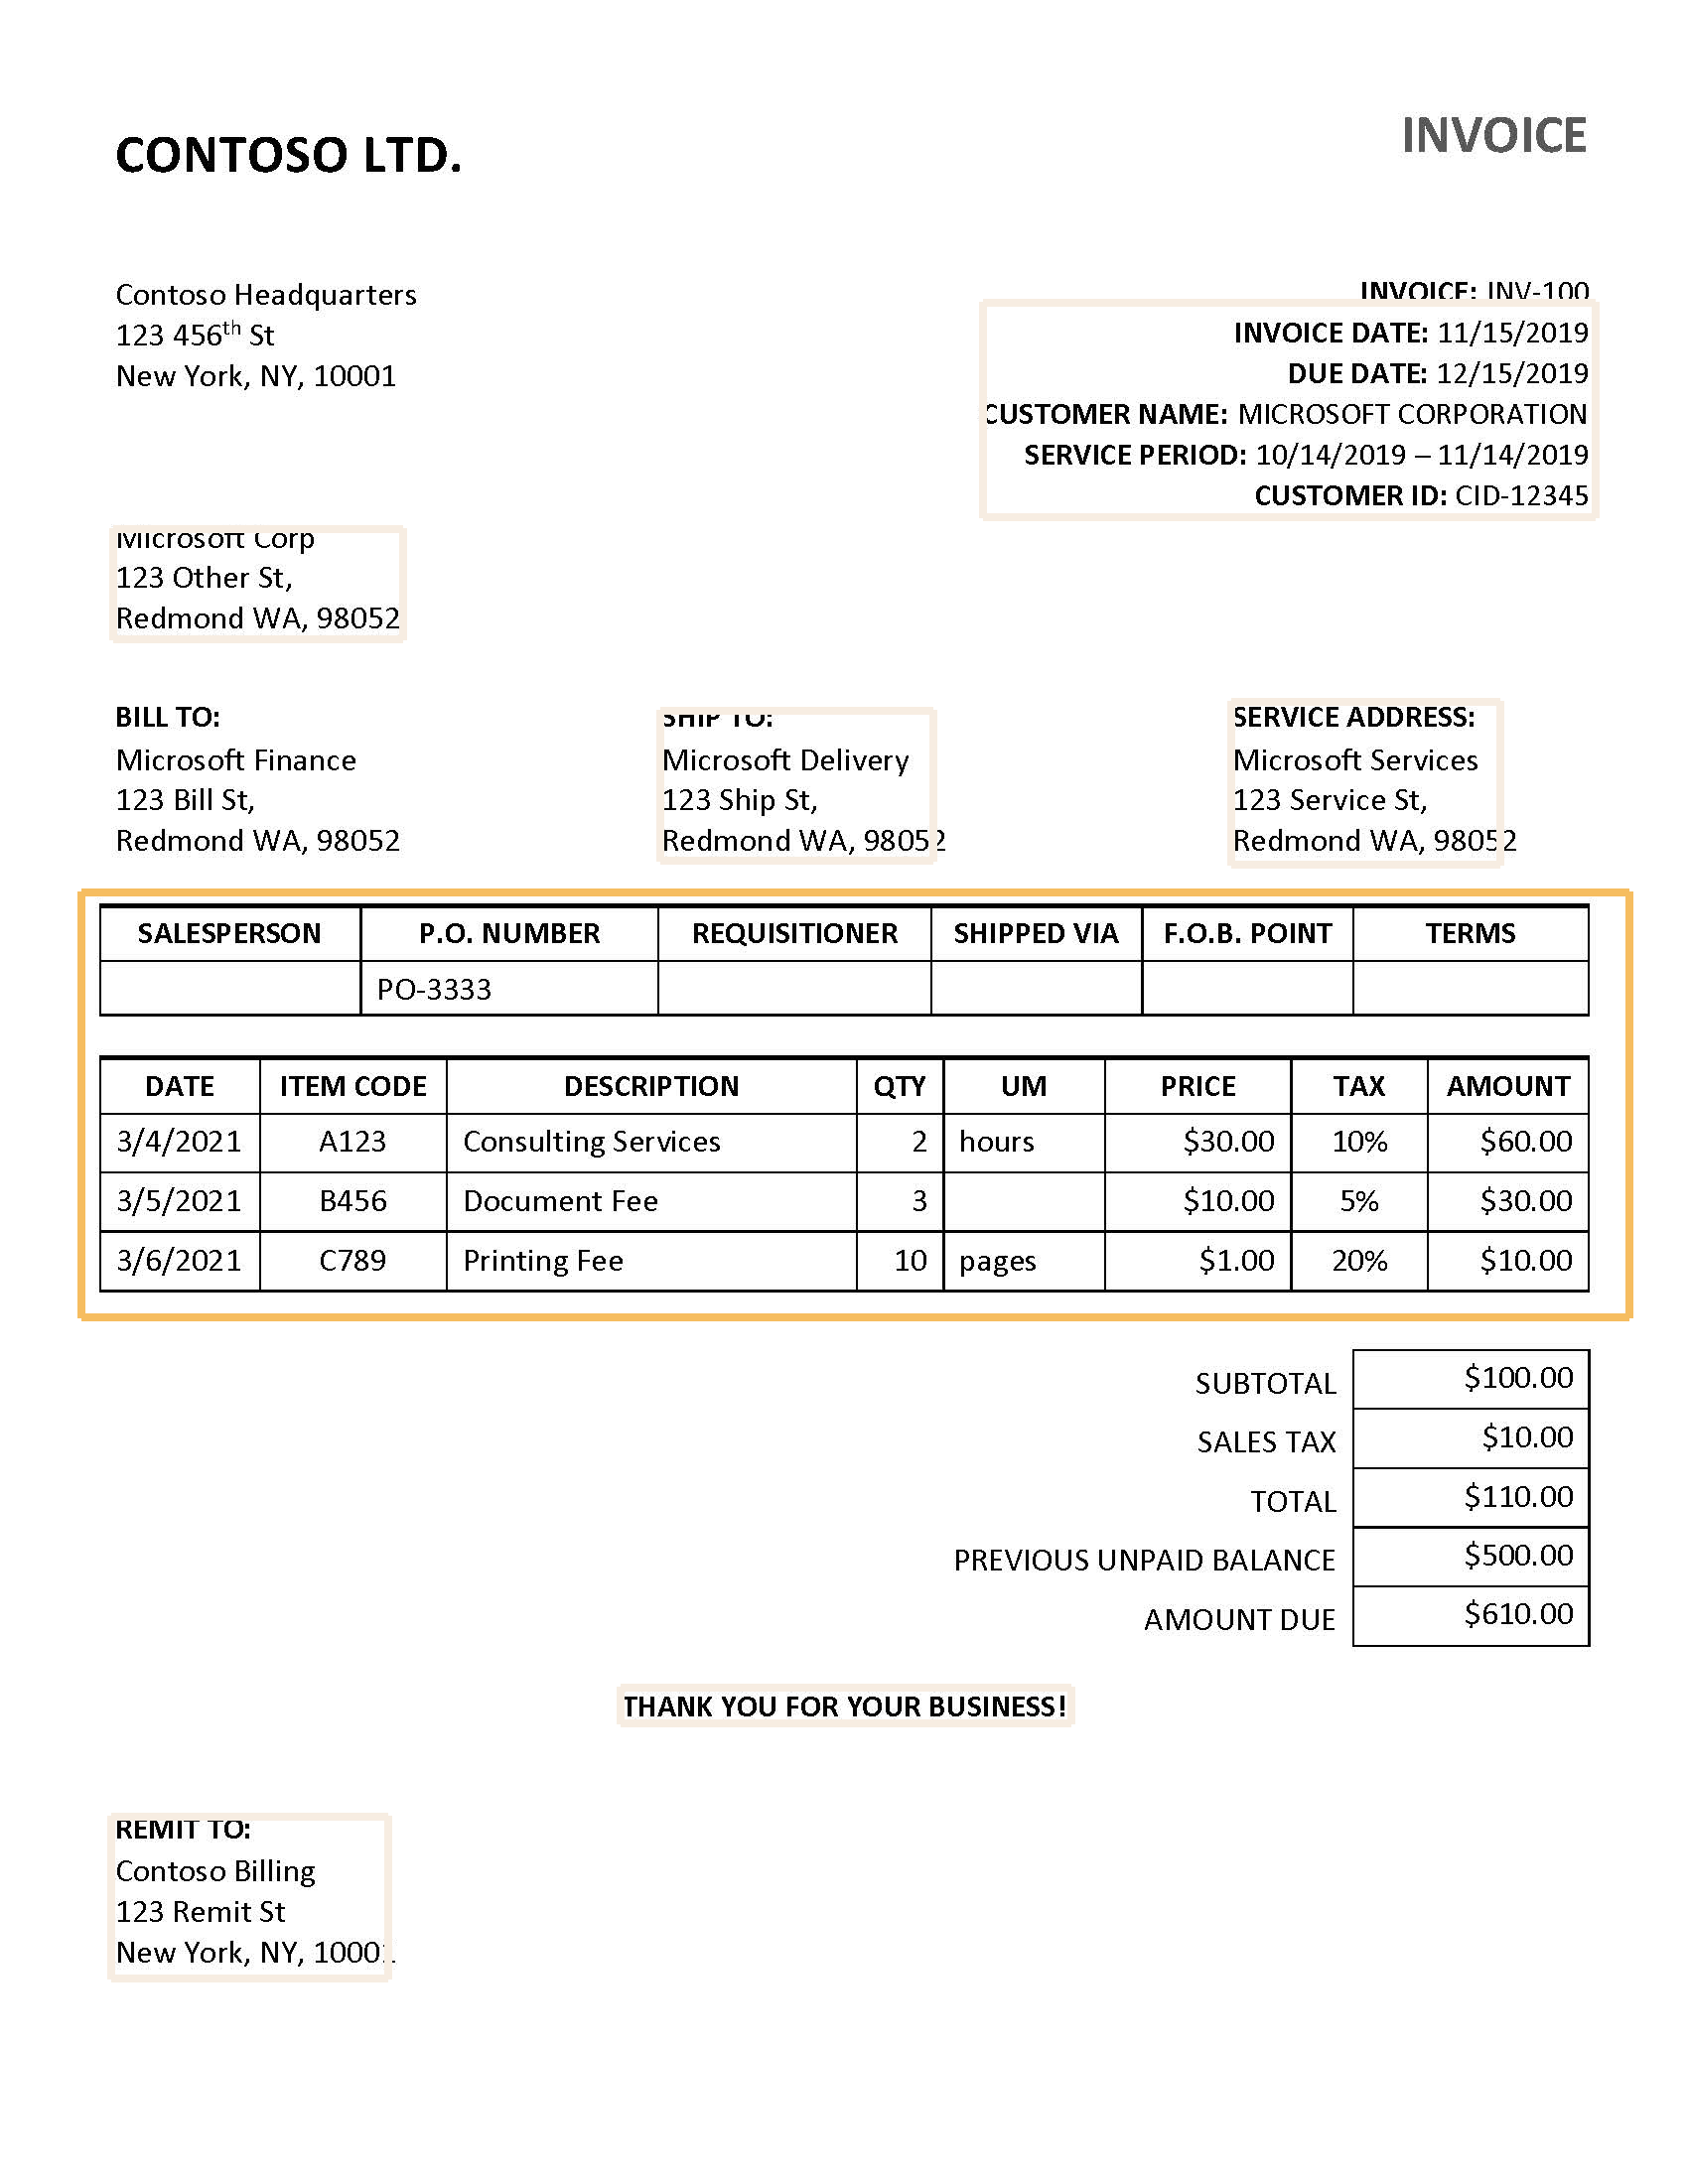

In [26]:
model2 = lp.Detectron2LayoutModel('lp://PubLayNet/faster_rcnn_R_50_FPN_3x/config',extra_config=["MODEL.ROI_HEADS.SCORE_THRESH_TEST", 0.65],
                                 label_map={0: "Text", 1: "Title", 2: "List", 3:"Table", 4:"Figure"})
layout2 = model2.detect(image2)
lp.draw_box(image2, layout2,)

In [34]:
text_blocks2 = lp.Layout([a for a in layout2 if a.type=="Title"])
text_blocks2

Layout(_blocks=[TextBlock(block=Rectangle(x_1=625.2606201171875, y_1=1699.5662841796875, x_2=1078.05810546875, y_2=1736.198974609375), text=None, id=None, type=Title, parent=None, next=None, score=0.9471355080604553), TextBlock(block=Rectangle(x_1=990.3140258789062, y_1=304.5577697753906, x_2=1606.752685546875, y_2=521.831787109375), text=None, id=None, type=Title, parent=None, next=None, score=0.9426872134208679), TextBlock(block=Rectangle(x_1=1240.244384765625, y_1=706.6053466796875, x_2=1510.6474609375, y_2=871.199951171875), text=None, id=None, type=Title, parent=None, next=None, score=0.8475711345672607), TextBlock(block=Rectangle(x_1=112.69271850585938, y_1=1829.9151611328125, x_2=390.9712829589844, y_2=1993.610595703125), text=None, id=None, type=Title, parent=None, next=None, score=0.8370891213417053), TextBlock(block=Rectangle(x_1=665.5091552734375, y_1=715.9461669921875, x_2=939.541015625, y_2=867.4468383789062), text=None, id=None, type=Title, parent=None, next=None, score=0

In [35]:
figure_blocks2 = lp.Layout([a for a in layout2 if a.type=='Figure'])
figure_blocks2

Layout(_blocks=[TextBlock(block=Rectangle(x_1=82.86260986328125, y_1=898.483154296875, x_2=1640.21875, y_2=1327.4775390625), text=None, id=None, type=Figure, parent=None, next=None, score=0.9358199834823608)], page_data={})

In [36]:
text_blocks2 = lp.Layout([b for b in text_blocks2 \
                   if not any(b.is_in(b_fig) for b_fig in figure_blocks2)])

In [37]:
h, w = image2.shape[:2]

left_interval = lp.Interval(0, w/2*1.05, axis='x').put_on_canvas(image2)

left_blocks = text_blocks2.filter_by(left_interval, center=True)
left_blocks.sort(key = lambda b:b.coordinates[1])

right_blocks = [b for b in text_blocks2 if b not in left_blocks]
right_blocks.sort(key = lambda b:b.coordinates[1])

# And finally combine the two list and add the index
# according to the order
text_blocks2 = lp.Layout([b.set(id = idx) for idx, b in enumerate(left_blocks + right_blocks)])

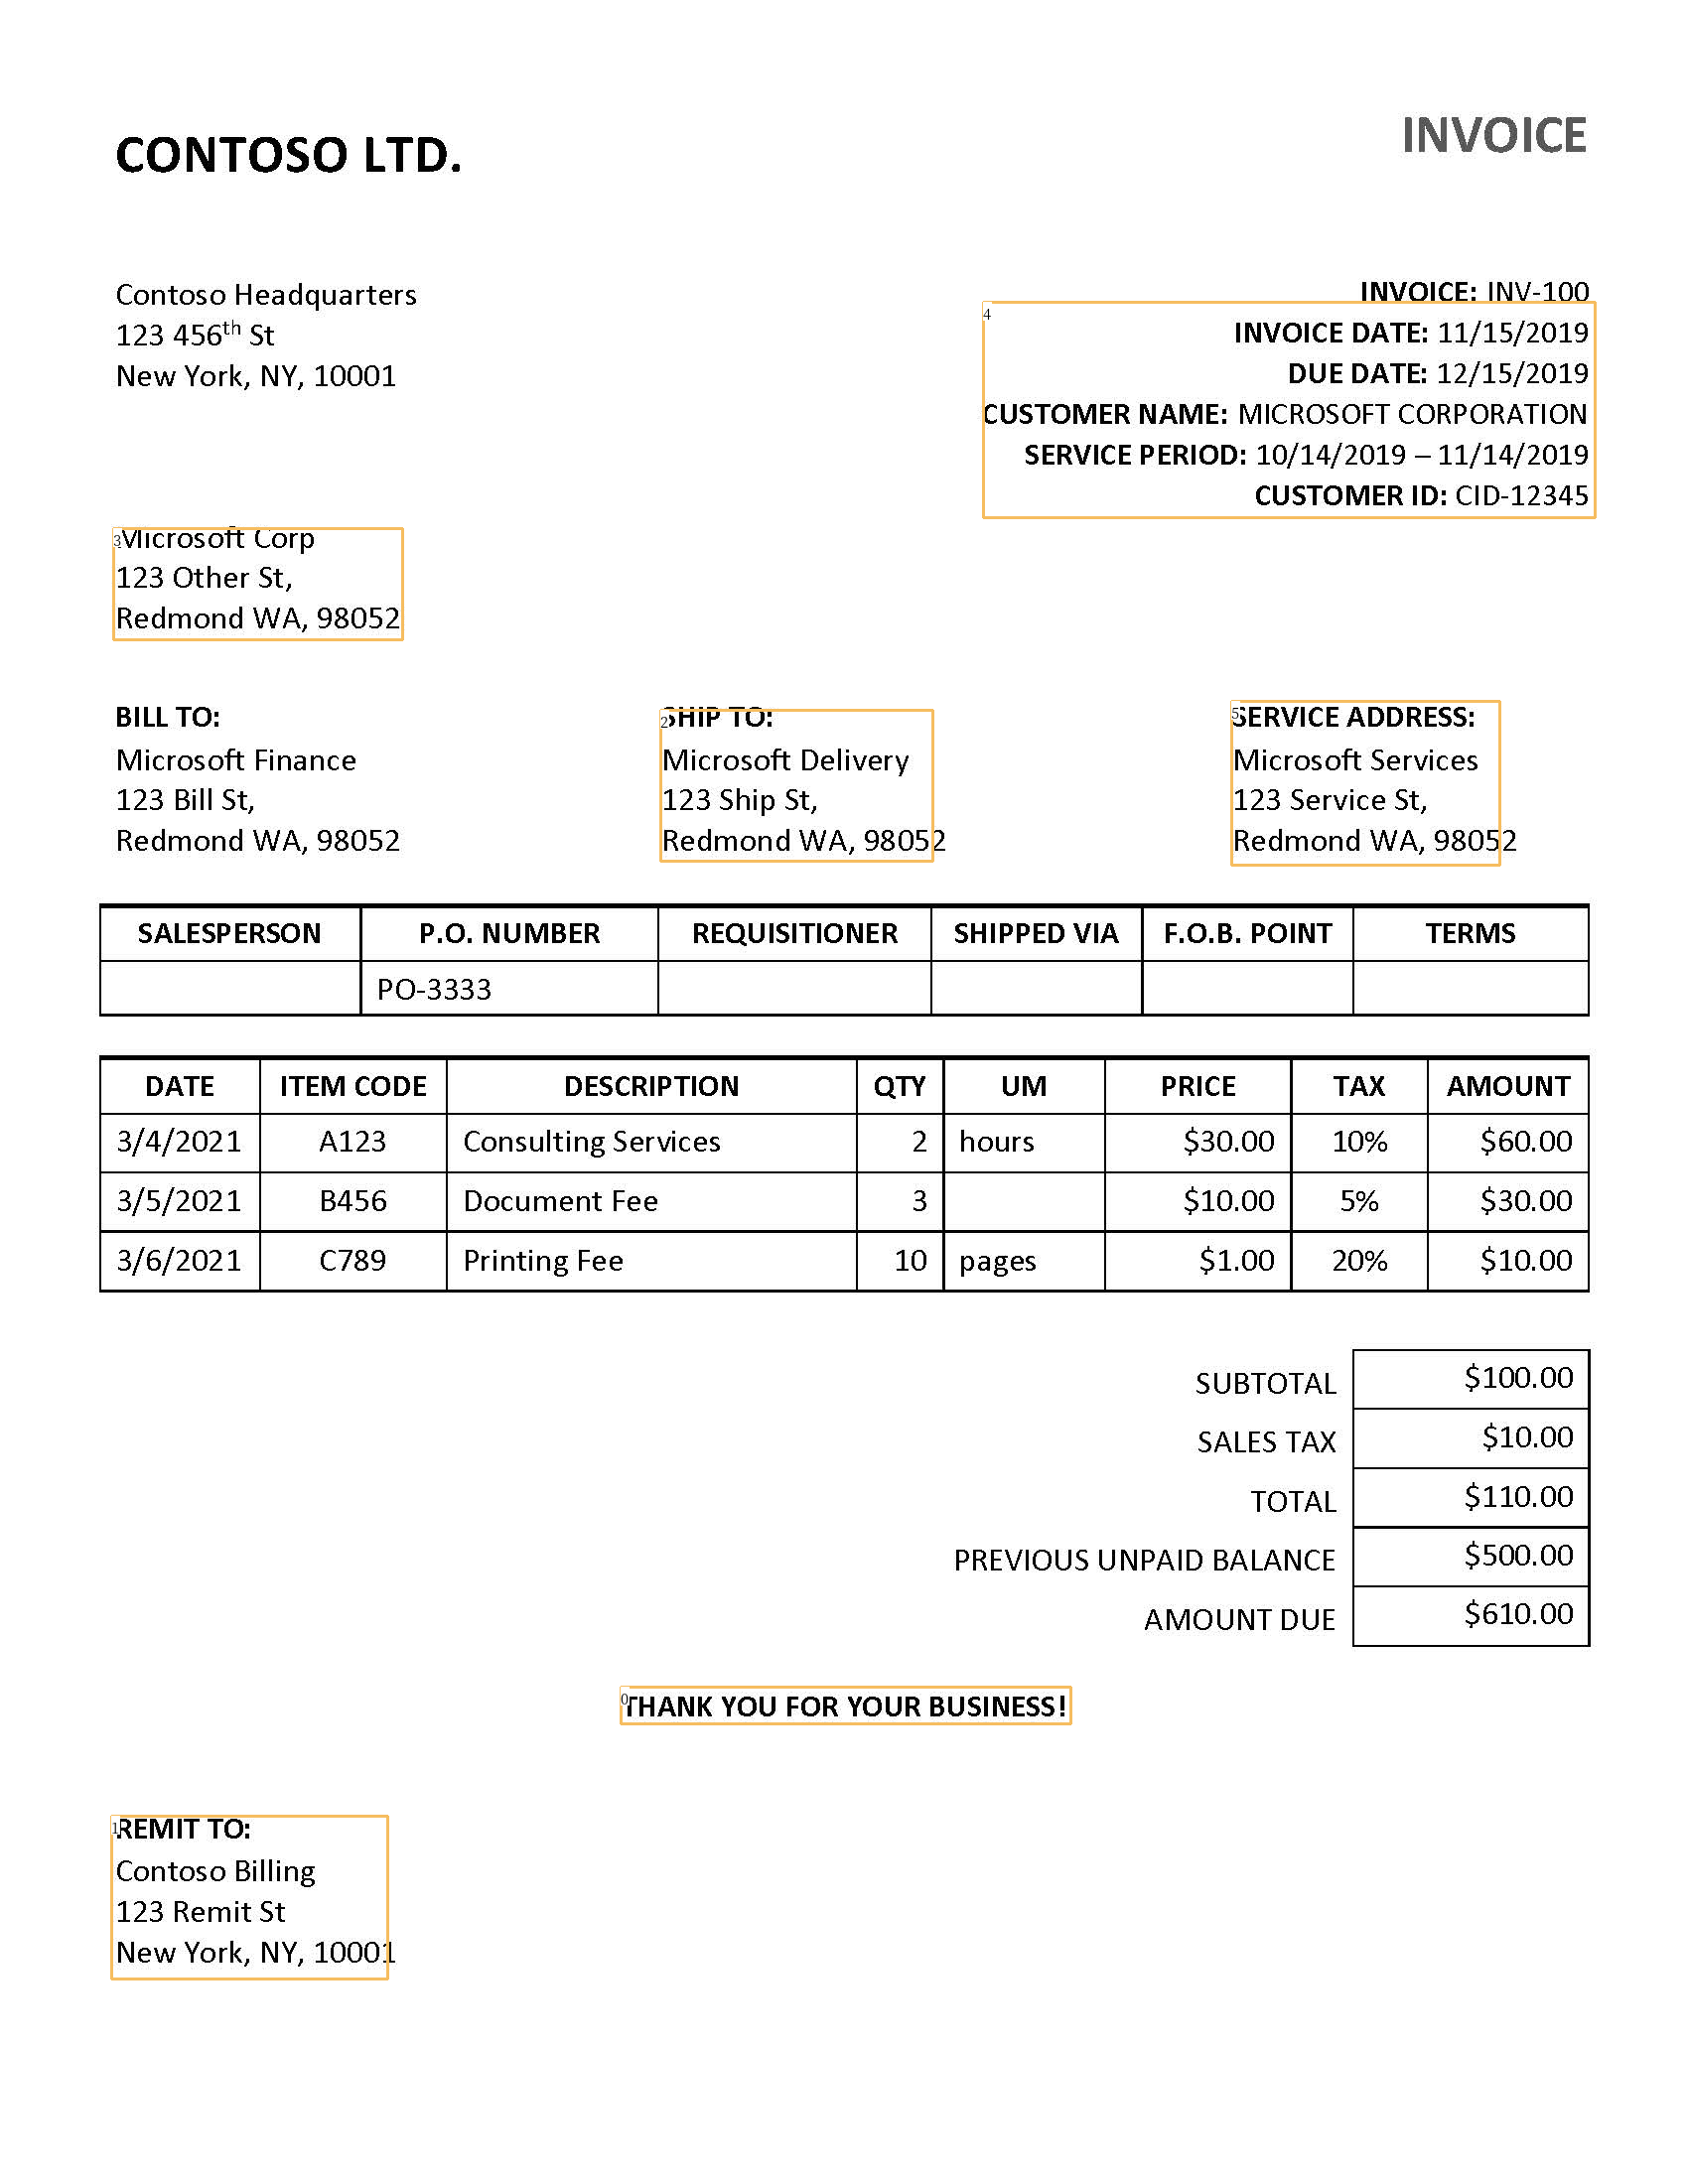

In [38]:
lp.draw_box(image2, text_blocks2,
            box_width=3, 
            show_element_id=True)

In [39]:
for block in text_blocks2:
    segment_image = (block
                       .pad(left=5, right=5, top=5, bottom=5)
                       .crop_image(image2))
        # add padding in each image segment can help
        # improve robustness 
        
    text = ocr_agent.detect(segment_image)
    block.set(text=text, inplace=True)

In [40]:
for txt in text_blocks2.get_texts():
    print(txt, end='\n---\n')

THANK YOU FOR YOUR BUSINESS!

---
REMIT TO:

Contoso Billing

123 Remit St

New York, NY, 10001

---
SHIP TO:

Microsoft Delivery
123 Ship St,
Redmond WA, 9805:

---
Microsoft Corp
123 Other St,
Redmond WA, 98052

---
INVOICE DATE: 11/15/2019

DUE DATE: 12/15/2019

CUSTOMER NAME: MICROSOFT CORPORATION
SERVICE PERIOD: 10/14/2019 — 11/14/2019
CUSTOMER ID: CID-12345

---
SERVICE ADDRESS:
Microsoft Services
123 Service St,
Redmond WA, 9805

---


In [41]:
text_blocks2.get_texts()

['THANK YOU FOR YOUR BUSINESS!\n\x0c',
 'REMIT TO:\n\nContoso Billing\n\n123 Remit St\n\nNew York, NY, 10001\n\x0c',
 'SHIP TO:\n\nMicrosoft Delivery\n123 Ship St,\nRedmond WA, 9805:\n\x0c',
 'Microsoft Corp\n123 Other St,\nRedmond WA, 98052\n\x0c',
 'INVOICE DATE: 11/15/2019\n\nDUE DATE: 12/15/2019\n\nCUSTOMER NAME: MICROSOFT CORPORATION\nSERVICE PERIOD: 10/14/2019 — 11/14/2019\nCUSTOMER ID: CID-12345\n\x0c',
 'SERVICE ADDRESS:\nMicrosoft Services\n123 Service St,\nRedmond WA, 9805\n\x0c']

In [42]:
for block in text_blocks2:
  print(block)

TextBlock(block=Rectangle(x_1=625.2606201171875, y_1=1699.5662841796875, x_2=1078.05810546875, y_2=1736.198974609375), text=THANK YOU FOR YOUR BUSINESS!
, id=0, type=Title, parent=None, next=None, score=0.9471355080604553)
TextBlock(block=Rectangle(x_1=112.69271850585938, y_1=1829.9151611328125, x_2=390.9712829589844, y_2=1993.610595703125), text=REMIT TO:

Contoso Billing

123 Remit St

New York, NY, 10001
, id=1, type=Title, parent=None, next=None, score=0.8370891213417053)
TextBlock(block=Rectangle(x_1=665.5091552734375, y_1=715.9461669921875, x_2=939.541015625, y_2=867.4468383789062), text=SHIP TO:

Microsoft Delivery
123 Ship St,
Redmond WA, 9805:
, id=2, type=Title, parent=None, next=None, score=0.8170925378799438)
TextBlock(block=Rectangle(x_1=114.36119079589844, y_1=532.3807373046875, x_2=405.8364562988281, y_2=644.8739013671875), text=Microsoft Corp
123 Other St,
Redmond WA, 98052
, id=3, type=Title, parent=None, next=None, score=0.7885803580284119)
TextBlock(block=Rectang

In [43]:
sentence2=["".join(txt) for txt in text_blocks2.get_texts()]

In [44]:
".".join(sentence2)

'THANK YOU FOR YOUR BUSINESS!\n\x0c.REMIT TO:\n\nContoso Billing\n\n123 Remit St\n\nNew York, NY, 10001\n\x0c.SHIP TO:\n\nMicrosoft Delivery\n123 Ship St,\nRedmond WA, 9805:\n\x0c.Microsoft Corp\n123 Other St,\nRedmond WA, 98052\n\x0c.INVOICE DATE: 11/15/2019\n\nDUE DATE: 12/15/2019\n\nCUSTOMER NAME: MICROSOFT CORPORATION\nSERVICE PERIOD: 10/14/2019 — 11/14/2019\nCUSTOMER ID: CID-12345\n\x0c.SERVICE ADDRESS:\nMicrosoft Services\n123 Service St,\nRedmond WA, 9805\n\x0c'

In [45]:
doc = nlp(".".join(sentence2))
for ent in doc.ents:
  print(ent.text,ent.label_)

/usr/local/lib/python3.7/dist-packages/torch/autocast_mode.py:162: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


New York GPE
NY GPE
10001 CARDINAL
Microsoft Delivery ORG
Redmond GPE
WA GPE
9805:
 CARDINAL
.Microsoft Corp ORG
Redmond GPE
WA GPE
98052
 CARDINAL
11/15/2019

 DATE
12/15/2019

 DATE
MICROSOFT CORPORATION ORG
10/14/2019 — DATE
Microsoft Services ORG
Redmond GPE
WA GPE
9805
 CARDINAL
